In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

In [2]:
data = "/content/delhi_aqi.csv"
df = pd.read_csv(data)
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,11/25/2020 1:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,11/25/2020 2:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,11/25/2020 3:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,11/25/2020 4:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,11/25/2020 5:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18776 non-null  datetime64[ns]
 1   co      18776 non-null  float64       
 2   no      18776 non-null  float64       
 3   no2     18776 non-null  float64       
 4   o3      18776 non-null  float64       
 5   so2     18776 non-null  float64       
 6   pm2_5   18776 non-null  float64       
 7   pm10    18776 non-null  float64       
 8   nh3     18776 non-null  float64       
 9   day     18776 non-null  object        
 10  month   18776 non-null  int32         
 11  year    18776 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(2), object(1)
memory usage: 1.6+ MB


In [26]:
summary_statistics = df.describe()
summary_statistics

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,month,year
count,18776,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2021-12-23 14:35:34.384320256,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815,6.609608,2021.470121
min,2020-11-25 01:00:00,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000,1.000000,2020.000000
25%,2021-06-09 14:45:00,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000,3.000000,2021.000000
50%,2021-12-22 04:30:00,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000,7.000000,2021.000000
75%,2022-07-07 18:15:00,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000,10.000000,2022.000000
max,2023-01-24 08:00:00,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000,12.000000,2023.000000
std,NaN,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108,3.621966,0.635113


In [4]:
#Step 1: Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

#Step 2: Create new columns for day, month and year
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Step 3: Calculate daily average for each pollutant

daily_avg = df.groupby('day').mean(numeric_only=True).reset_index()

#Step 4: Plot trends for key pollutants over time
def plot_trend(data, pollutant, title):
    plt.figure(figsize=(14,7))
    plt.plot(data['day'], data[pollutant], marker='o', linestyle='-', markersize=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Concentration')
    plt.grid(True)
    plt.show()

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

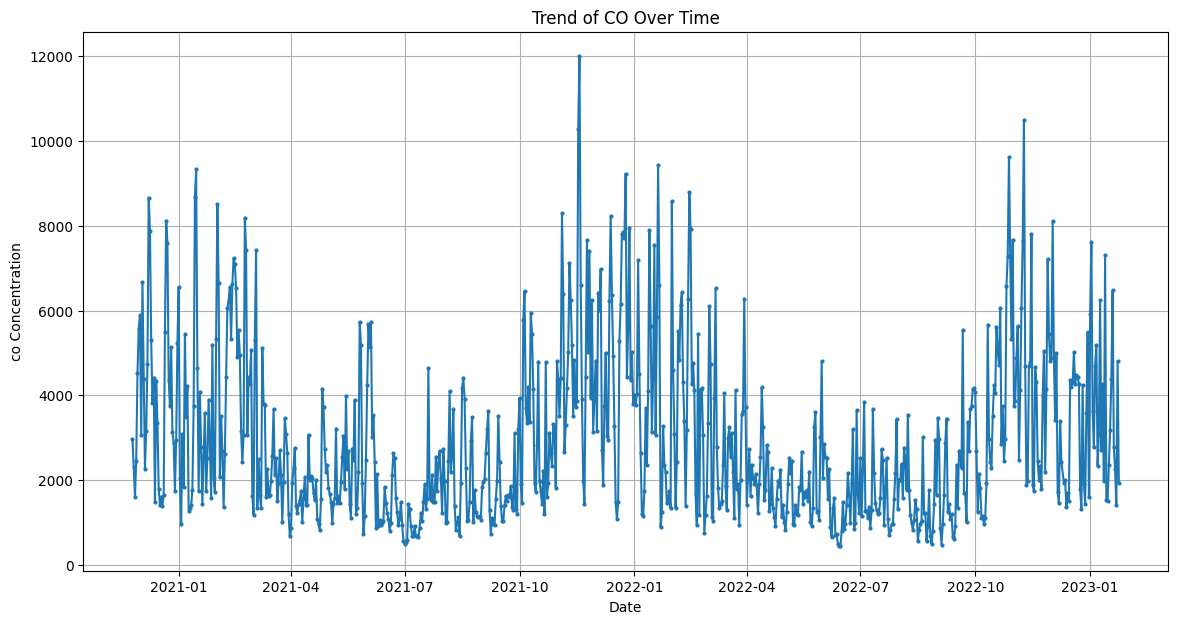

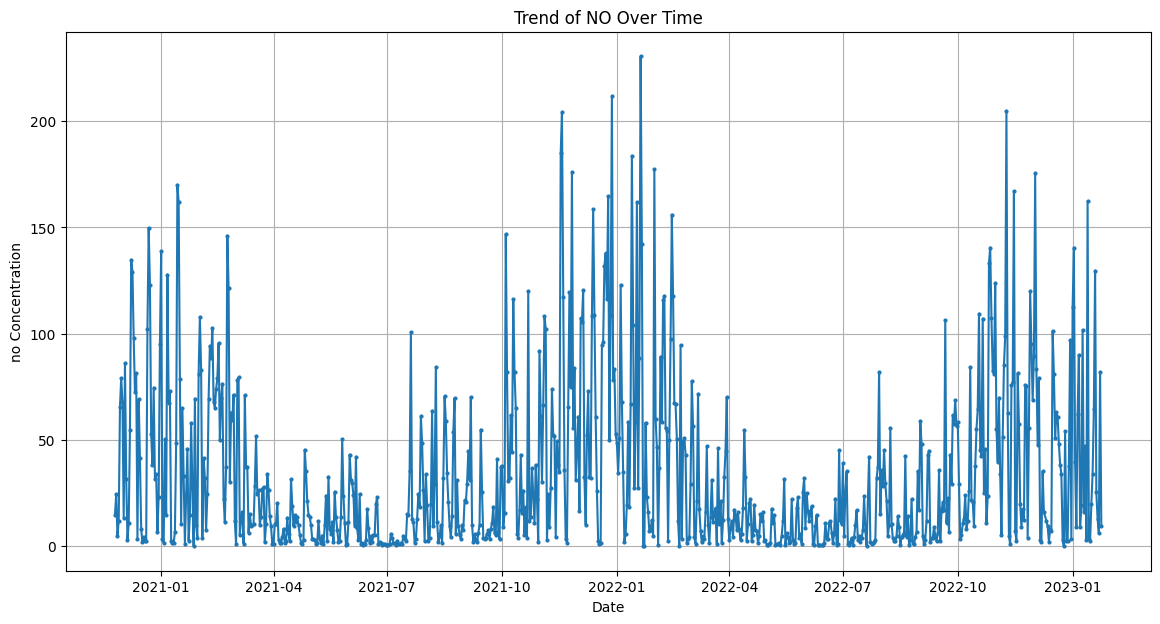

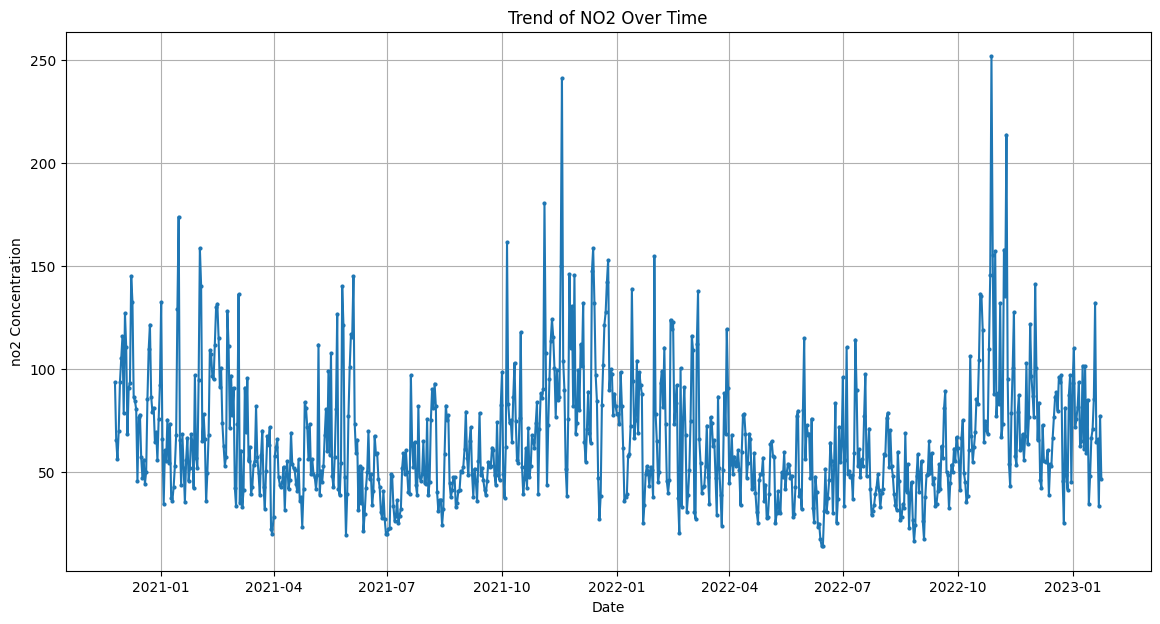

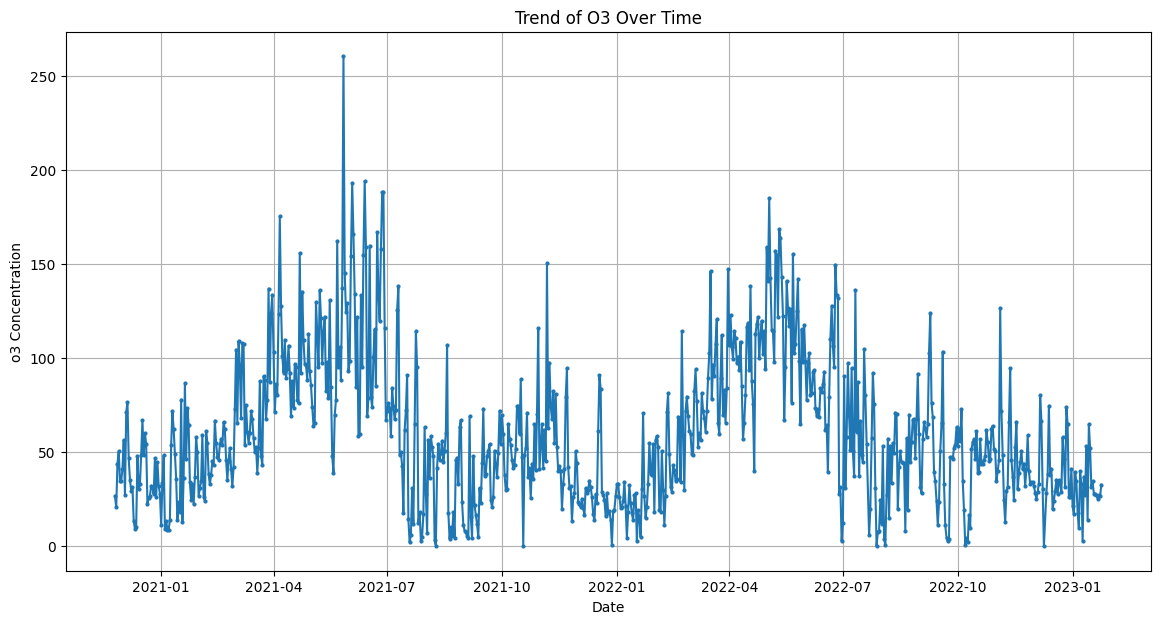

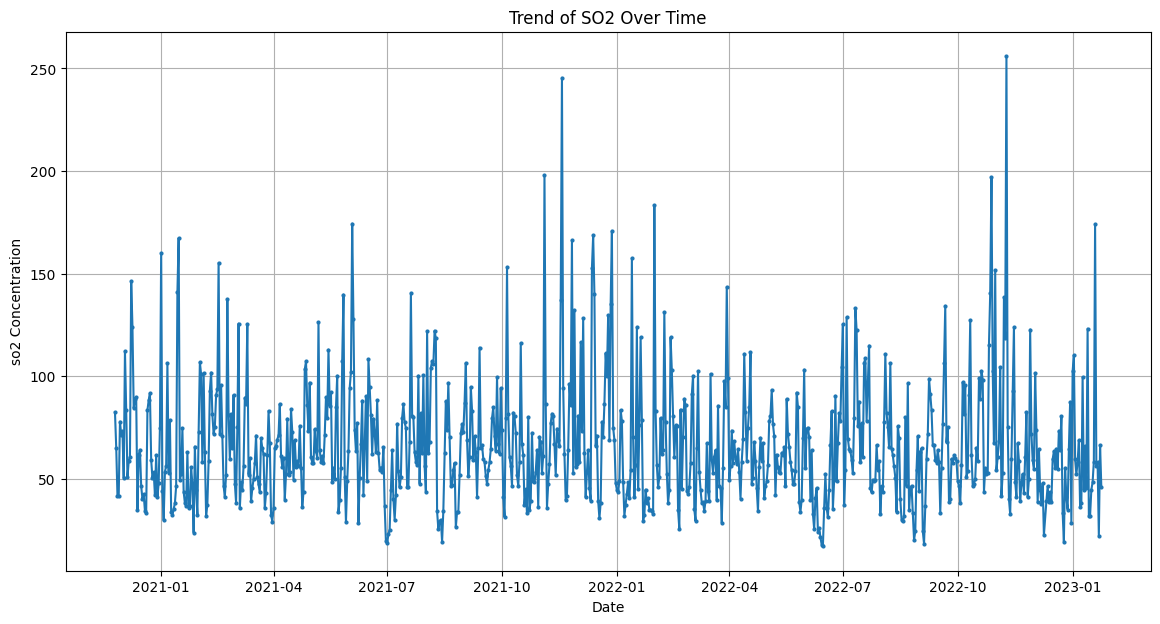

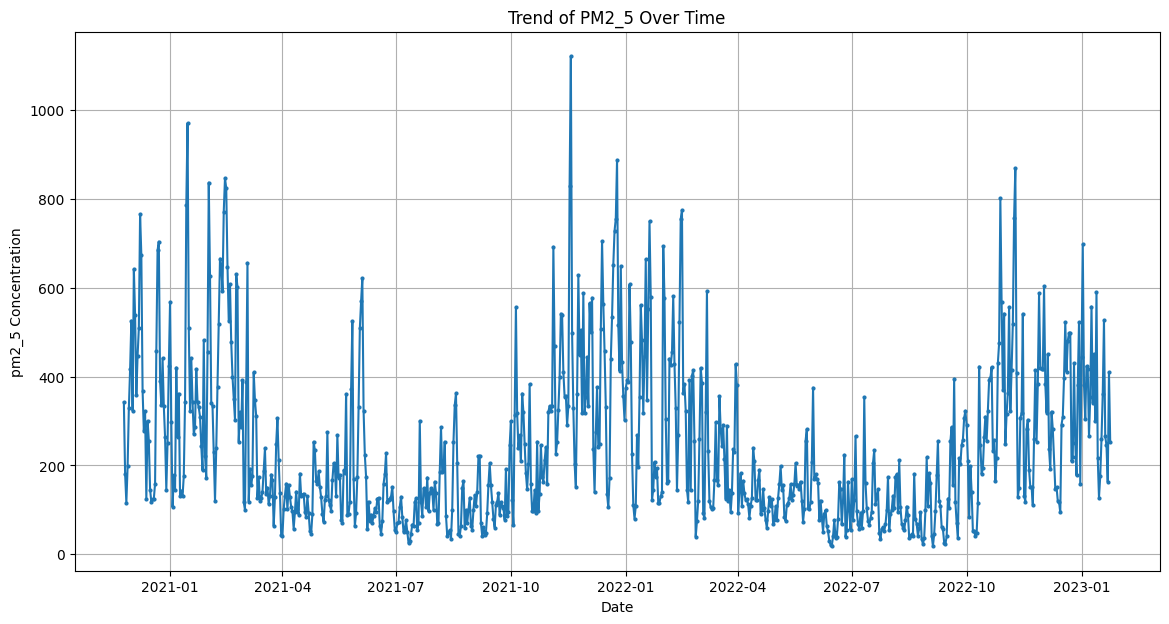

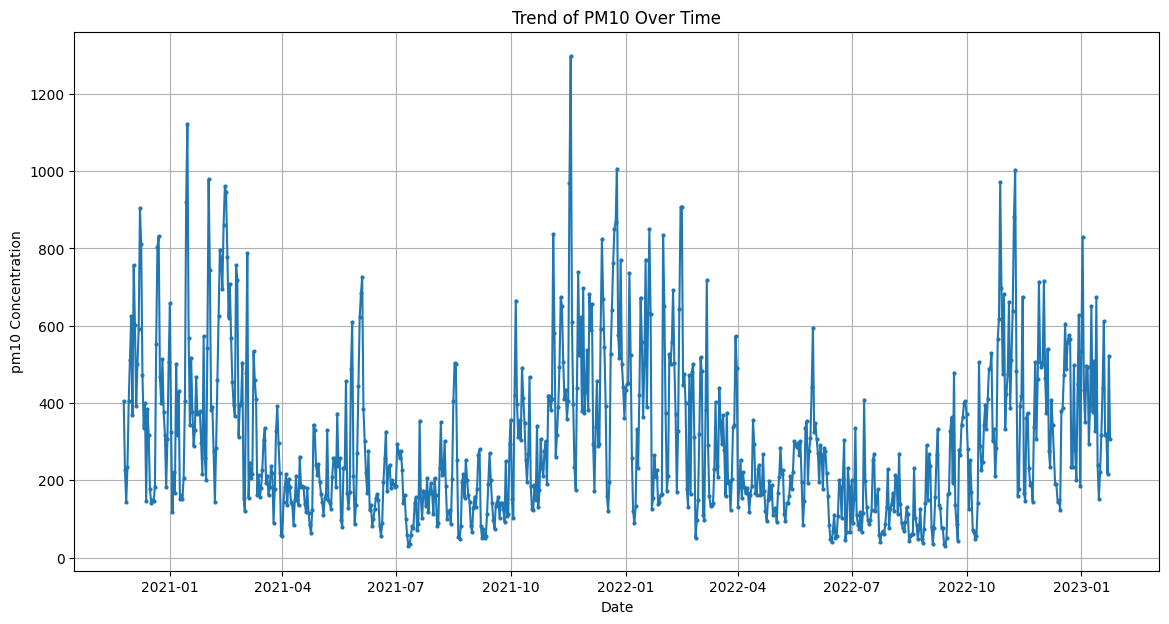

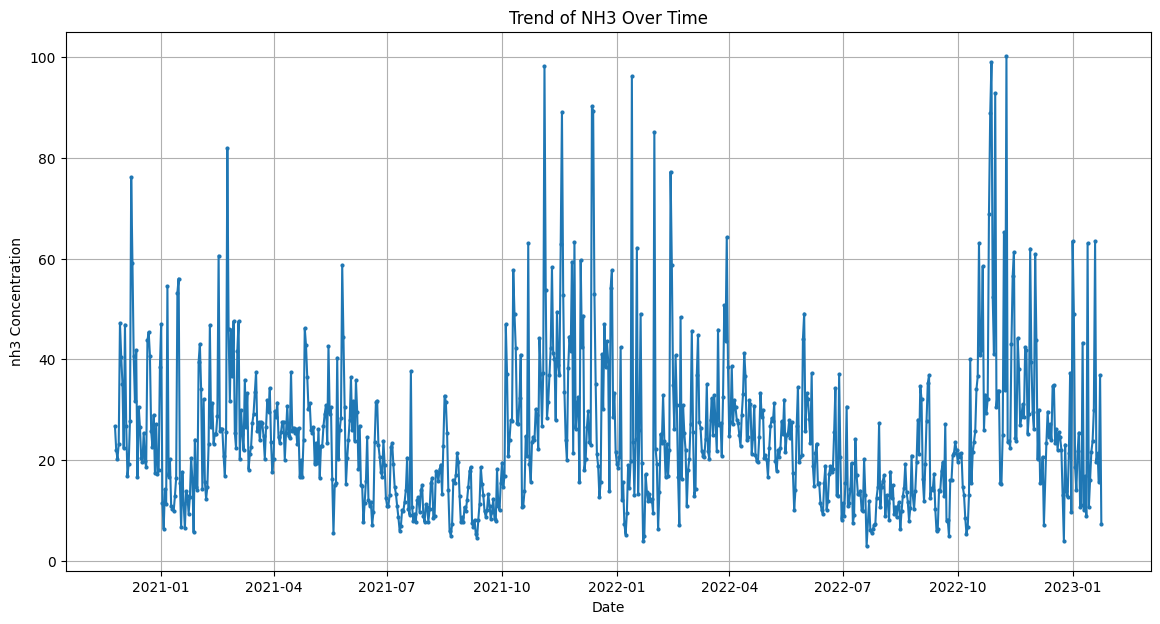

In [5]:
for pollutant in pollutants:
    plot_trend(daily_avg, pollutant, f'Trend of {pollutant.upper()} Over Time')

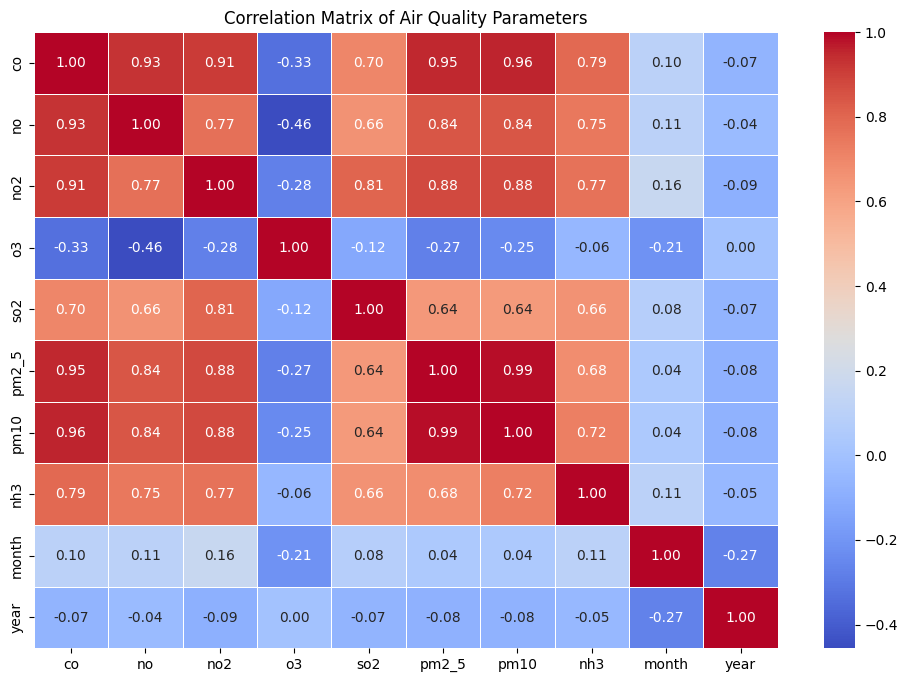

In [6]:
#Step 1: Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

#Step 2: Create new columns for day, month and year
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Step 3: Calculate daily average for each pollutant

daily_avg = df.groupby('day').mean(numeric_only=True).reset_index()

# Remove the 'day' column from the dataframe to calculate the correlation matrix
daily_avg_no_day = daily_avg.drop(columns=['day'])

# Step 1: Calculate the correlation matrix
correlation_matrix = daily_avg_no_day.corr()

# Step 2: Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()


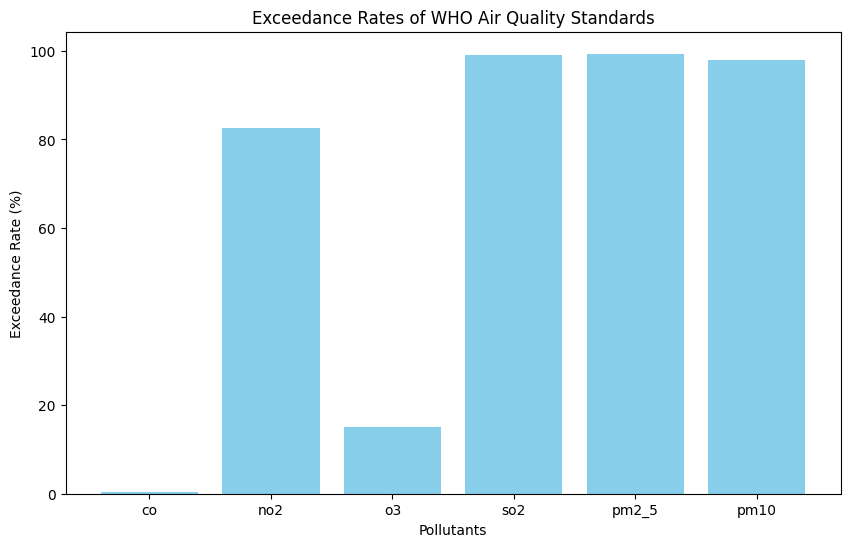

{'co': 0.38022813688212925,
 'no2': 82.50950570342205,
 'o3': 15.082382762991129,
 'so2': 99.11280101394169,
 'pm2_5': 99.36628643852978,
 'pm10': 97.84537389100126}

In [7]:
# Define the WHO standards
who_standards = {
    'co': 10,  # in mg/m³, need to convert to µg/m³
    'no2': 40,  # in µg/m³
    'o3': 100,  # in µg/m³
    'so2': 20,  # in µg/m³
    'pm2_5': 25,  # in µg/m³
    'pm10': 50  # in µg/m³
}

# Convert CO standard from mg/m³ to µg/m³ for consistency
who_standards['co'] = who_standards['co'] * 1000

# Calculate the exceedance rates
exceedance_rates = {}
for pollutant, standard in who_standards.items():
    exceedance_days = daily_avg[daily_avg[pollutant] > standard].shape[0]
    total_days = daily_avg.shape[0]
    exceedance_rate = (exceedance_days / total_days) * 100
    exceedance_rates[pollutant] = exceedance_rate

# Plotting the exceedance rates
plt.figure(figsize=(10, 6))
plt.bar(exceedance_rates.keys(), exceedance_rates.values(), color='skyblue')
plt.xlabel('Pollutants')
plt.ylabel('Exceedance Rate (%)')
plt.title('Exceedance Rates of WHO Air Quality Standards')
plt.show()

# Print the exceedance rates for review
exceedance_rates


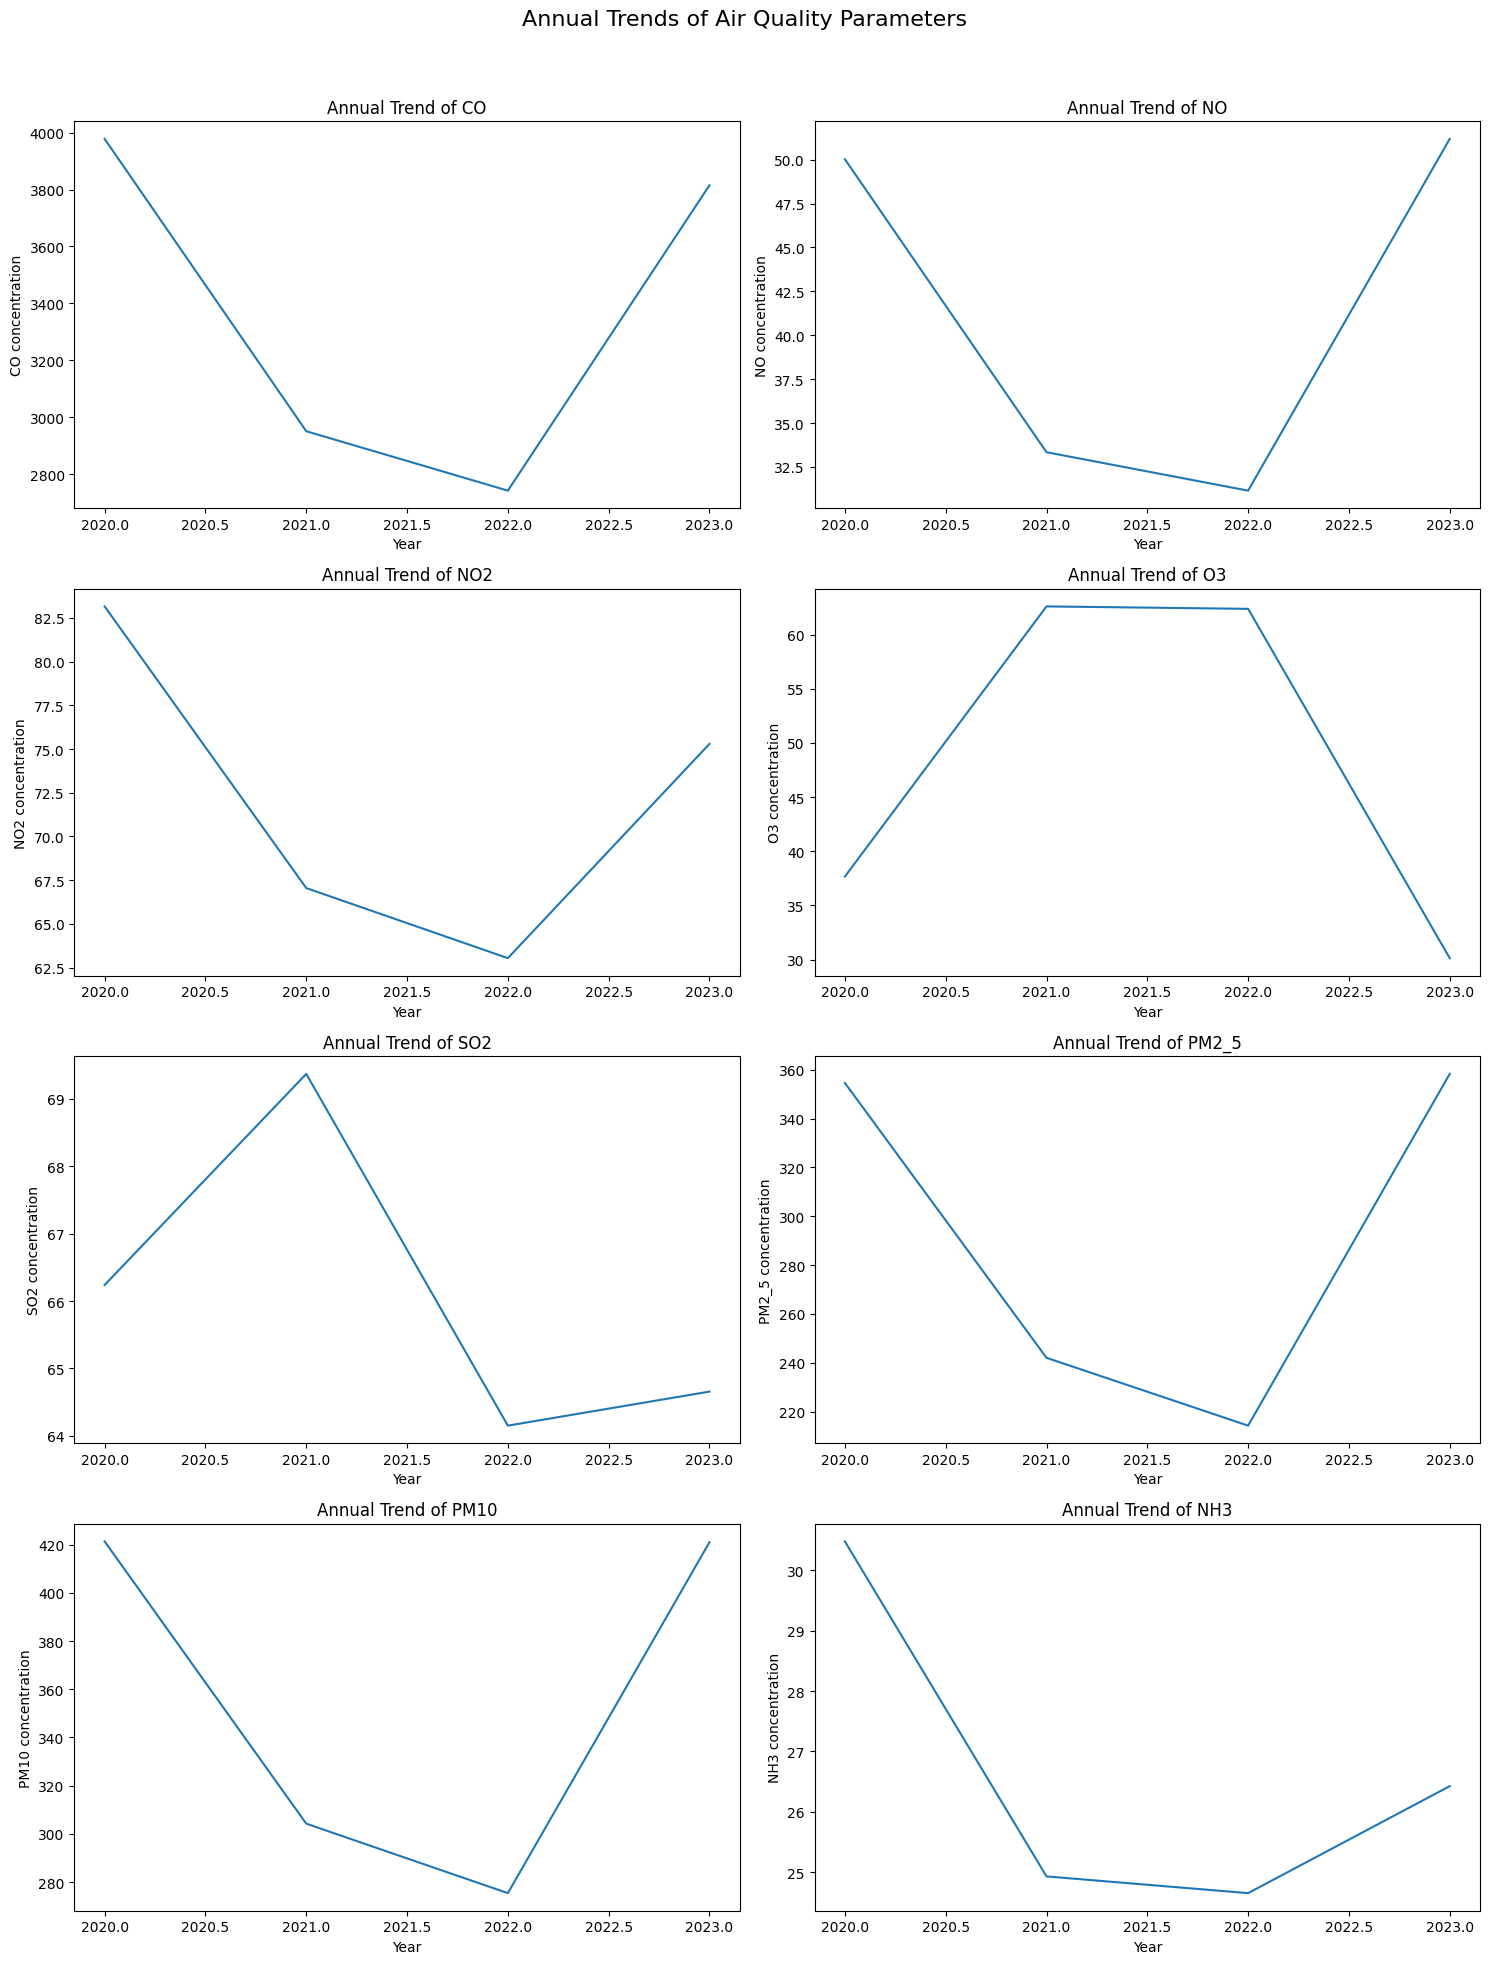

In [8]:
# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Annual Trends of Air Quality Parameters', fontsize=16)

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'year']

# Tính trung bình hàng các năm
yearly_avg = df[pollutants].groupby('year').mean()

for ax, pollutant in zip(axes.flatten(), pollutants):
    ax.plot(yearly_avg.index, yearly_avg[pollutant])
    ax.set_title(f'Annual Trend of {pollutant.upper()}')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{pollutant.upper()} concentration')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

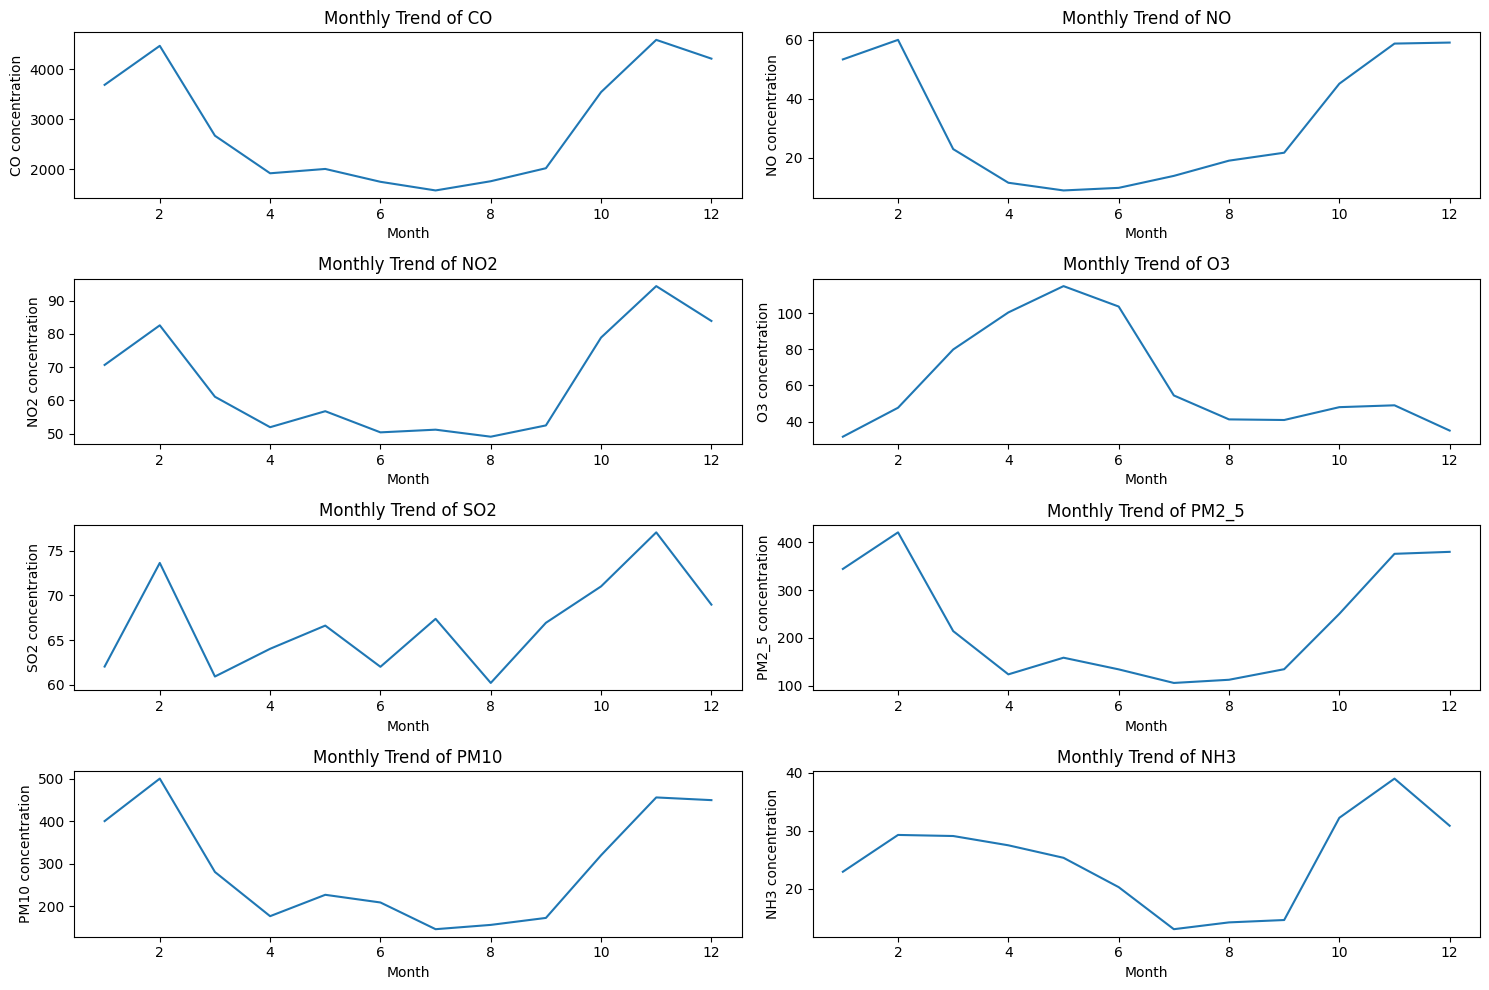

In [9]:
# Chỉ chọn các cột số học cần thiết
numeric_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'month', 'year']

# Tính trung bình hàng tháng
monthly_avg = df[numeric_columns].groupby('month').mean().reset_index()

# Vẽ biểu đồ xu hướng hàng tháng
plt.figure(figsize=(15, 10))

pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=monthly_avg, x='month', y=pollutant)
    plt.title(f'Monthly Trend of {pollutant.upper()}')
    plt.xlabel('Month')
    plt.ylabel(f'{pollutant.upper()} concentration')

plt.tight_layout()
plt.show()

In [10]:
def pm25_to_aqi(pm25):
    if pm25 <= 12:
        return pm25 * 50 / 12
    elif pm25 <= 35.4:
        return 50 + (pm25 - 12) * (100 - 51) / (35.4 - 12)
    elif pm25 <= 55.4:
        return 100 + (pm25 - 35.4) * (150 - 101) / (55.4 - 35.4)
    elif pm25 <= 150.4:
        return 150 + (pm25 - 55.4) * (200 - 151) / (150.4 - 55.4)
    elif pm25 <= 250.4:
        return 200 + (pm25 - 150.4) * (300 - 201) / (250.4 - 150.4)
    elif pm25 <= 350.4:
        return 300 + (pm25 - 250.4) * (400 - 301) / (350.4 - 250.4)
    elif pm25 <= 500.4:
        return 400 + (pm25 - 350.4) * (500 - 401) / (500.4 - 350.4)
    else:
        return 500

In [11]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse = mean_squared_error(test, predictions)

    # Round and calculate accuracy
    rounded_test = np.round(test)
    rounded_predictions = np.round(predictions)

    # Calculate accuracy
    acc = accuracy_score(rounded_test, rounded_predictions)

    result = {
        'model_fit': model_fit,
        'mse': mse,
        'predictions': predictions,
        'test': test,
        'train': train,
        'acc': acc
    }
    return result

In [12]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)['mse']
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print(f'ARIMA{order} MSE= {mse:.3f}')
                except Exception as e:
                    print(f'ARIMA{order} Exception: {e}')
                    continue
    print(f'Best ARIMA {best_cfg} MSE= {best_score:.3f}')

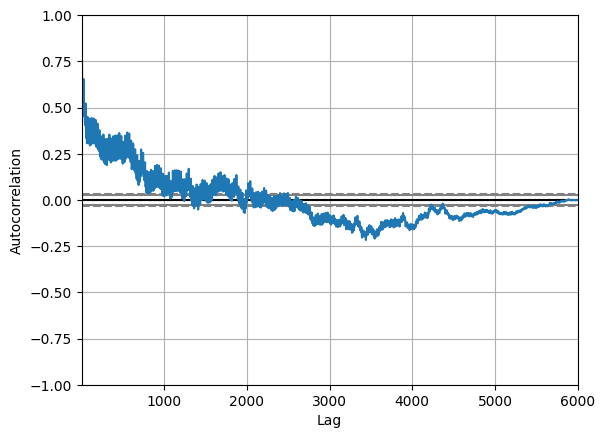

In [13]:
# Assuming df['pm2_5'] contains PM2.5 data
df_aqi = df['pm2_5'].apply(pm25_to_aqi)

# Use a smaller subset for quick testing
df_aqi_subset = df_aqi.head(6000)

# Plot autocorrelation
autocorrelation_plot(df_aqi_subset)
plt.show()

In [14]:
arima_order = (1, 0, 0)
arima_model_1 = evaluate_arima_model(df_aqi_subset.values, arima_order)
model_fit = arima_model_1['model_fit']

# Print results
print("Mean Squared Error:", arima_model_1['mse'])
print("Accuracy:", arima_model_1['acc'])

Mean Squared Error: 780.0327927292469
Accuracy: 0.03277777777777778


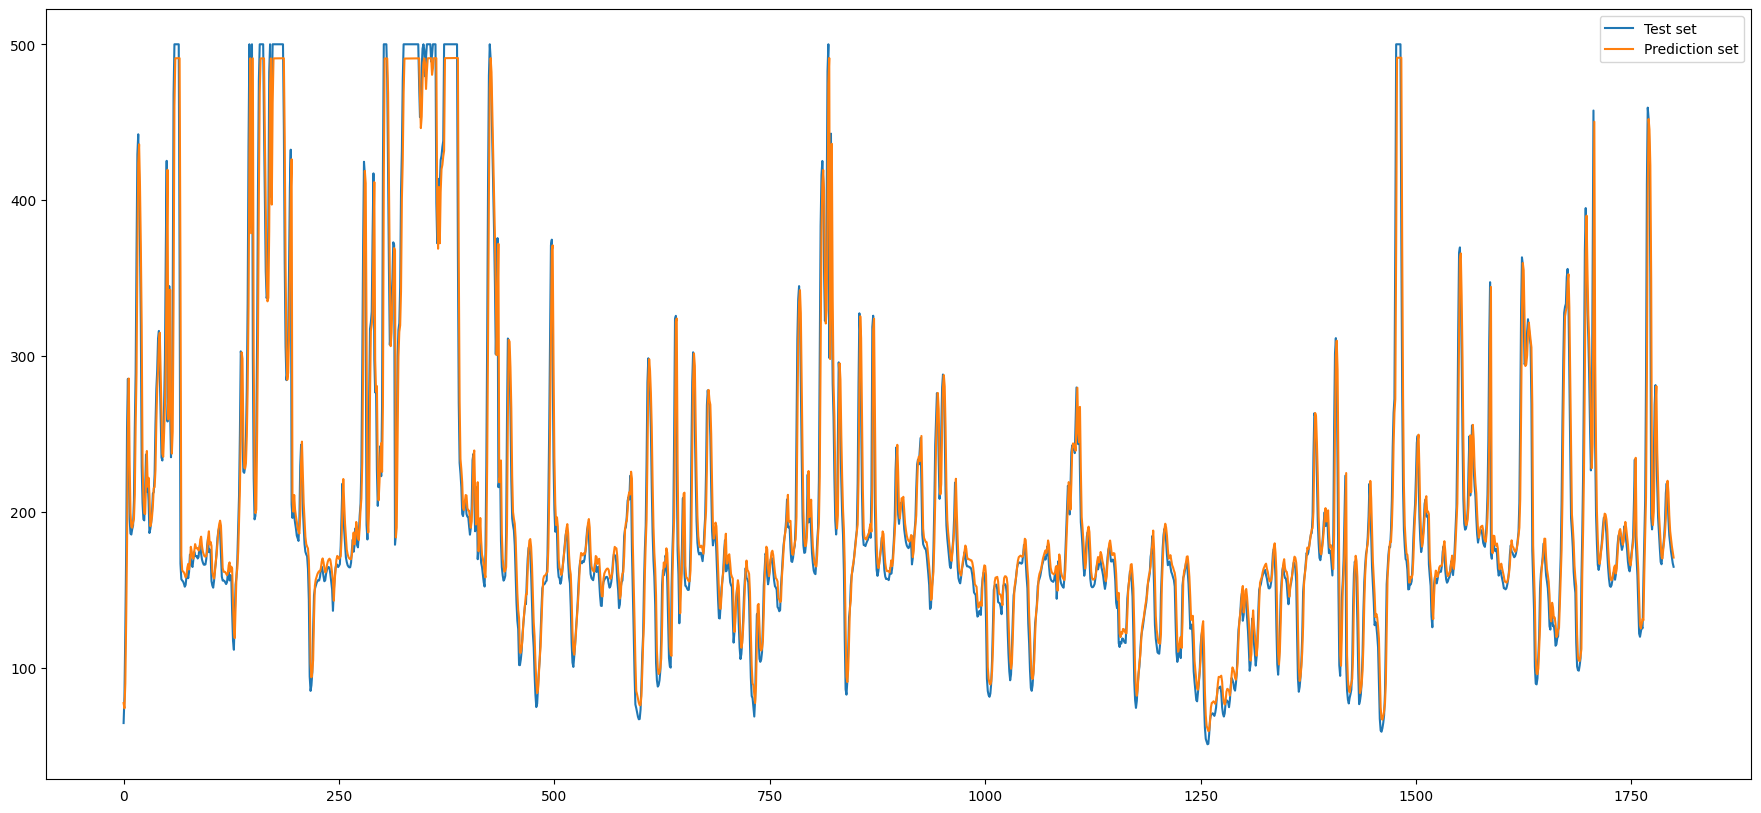

In [15]:
prediction = pd.Series(arima_model_1['predictions'])
test = pd.Series(arima_model_1['test'])

fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(test.reset_index(drop=True), label="Test set")
ax.plot(prediction.reset_index(drop=True), label="Prediction set")
ax.legend()
plt.show()

In [24]:
# Chuẩn bị dữ liệu cho hồi quy tuyến tính
X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = df_aqi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (15020, 8)
Test data size: (3756, 8)


R²: 0.8346936658913641
Mean Squared Error: 2822.1161512113463


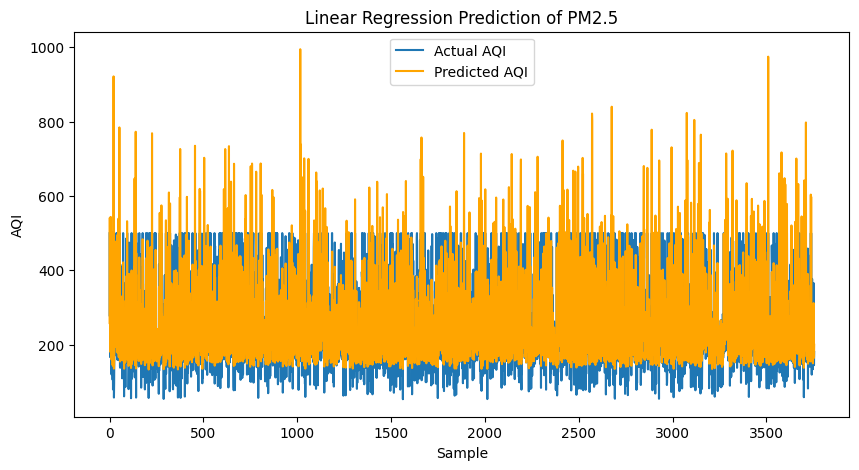

In [20]:
# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
print("R²:", r2)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual AQI')
plt.plot(y_pred, label='Predicted AQI', color='orange')
plt.legend()
plt.title('Linear Regression Prediction of PM2.5')
plt.xlabel('Sample')
plt.ylabel('AQI')
plt.show()
